## Exploratory Data Analysis - Retail
### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
#### ● As a business manager, try to find out the weak areas where you can work to make more profit.
#### ● What all business problems you can derive by exploring the data?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

In [6]:
print (data.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [8]:
# we have to rename some columns so that we can use it without any interuption.
data= data.rename(columns={'Ship Mode': 'ShipMode','Postal Code':'PostalCode','Sub-Category':'SubCategory'})

In [9]:
print (data.columns)

Index(['ShipMode', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'Category', 'SubCategory', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


In [10]:
data.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [11]:
data=data.drop('Country',axis=1)

In [12]:
data.ShipMode.value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: ShipMode, dtype: int64

In [13]:
data.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [14]:
data.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [15]:
data.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

### Insights from the above analysis
### 1. The shipment was done only in one country named "United States" .
### 2. There are mainly three types of category Official supplies, Technology , Furniture.
### 3. Most of the shipment is held in New York city.
### 4. There are basically four regions west ,south, central, east and most of the shipment was held in west .
### 5. There four types of shipment Mode.
#### --1. Standard Class
#### --2. Second Class
#### --3. First Class
#### --4. Same Day
### 6. There is mainly 3 segment where shipment was done.
#### --1. Consumer
#### --2.Corporate
#### -- 3. Home Office

In [16]:
# Check data that if there is any null value available or not , if there is any null value existed then we have to remove that particular data
data.isnull().sum()

ShipMode       0
Segment        0
City           0
State          0
PostalCode     0
Region         0
Category       0
SubCategory    0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

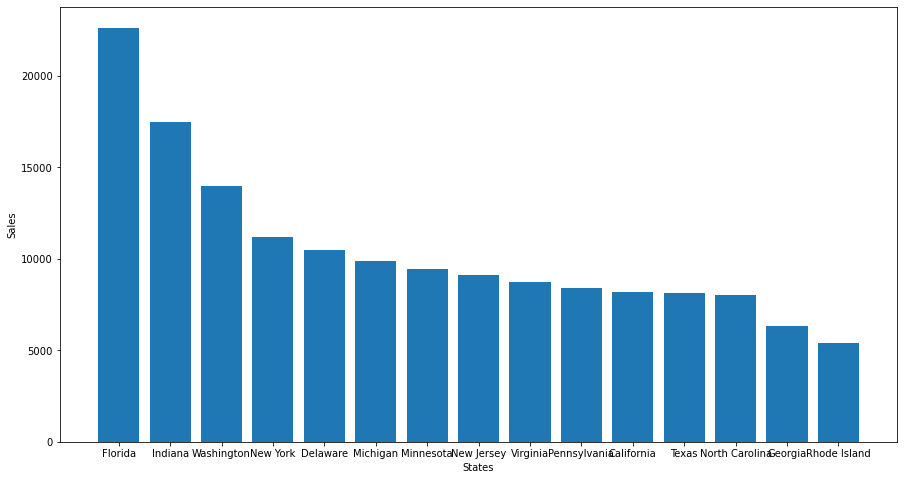

In [17]:
# Q: Tell me about the top 20 States in which maximum sales has been done?
plt.figure(figsize=(15,8))
y=data.sort_values(['Sales'], ascending=False).head(20)
plt.bar(y['State'], y['Sales']) 
plt.xlabel("States") 
plt.ylabel("Sales") 
plt.show()

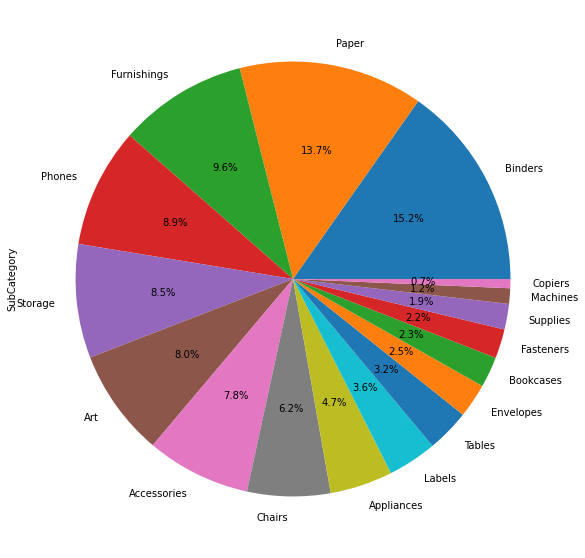

In [18]:
# Q: Which subcategory is mostly used ?
plt.figure(figsize=(12,10))
data['SubCategory'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

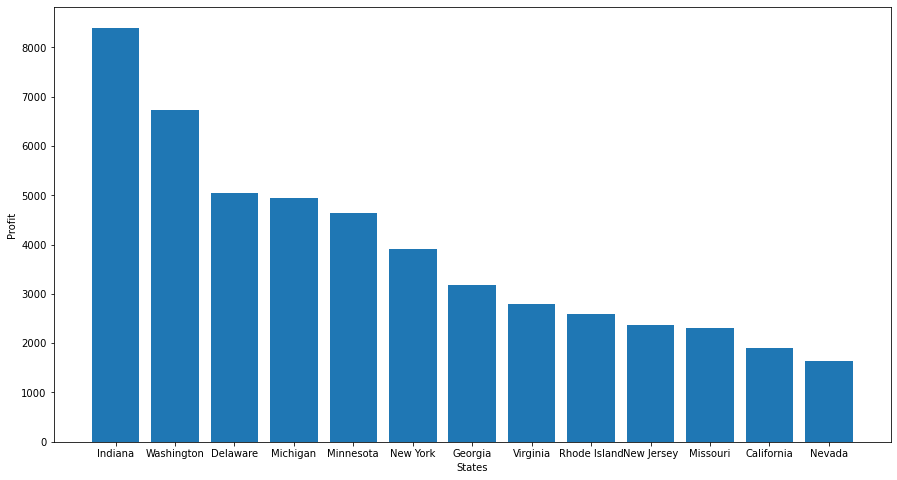

In [19]:
# Q: Tell me about the top 20 States which gave us maximum profit?
plt.figure(figsize=(15,8))
y=data.sort_values(['Profit'], ascending=False).head(20)
plt.bar(y['State'], y['Profit']) 
plt.xlabel("States") 
plt.ylabel("Profit") 
plt.show()

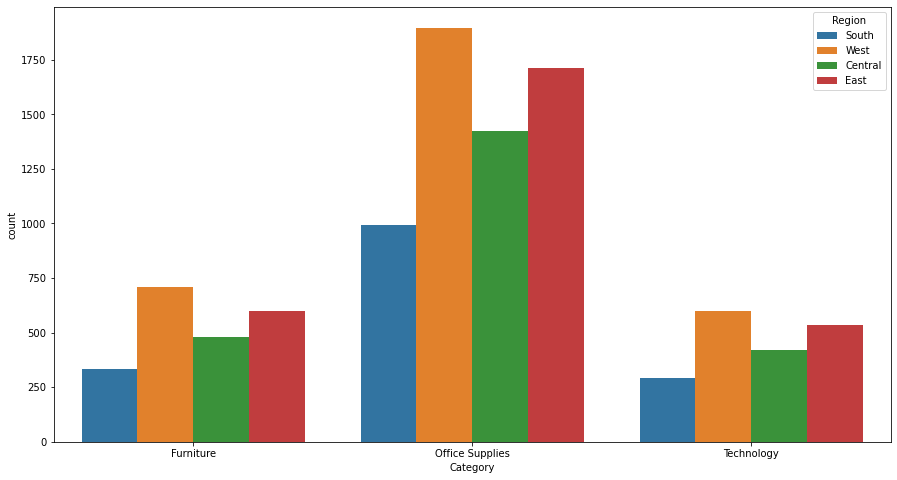

In [20]:
# Q: Which category product is mostly used in which region?
plt.figure(figsize=(15,8))
sns.countplot(x="Category", hue="Region", data=data)
plt.show()

In [21]:
#Products with high Profit Percentage 
data.sort_values(['Profit','SubCategory'],ascending=False).groupby('Profit').head(5)

,ShipMode,Segment,City,State,PostalCode,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
...,...,...,...,...,...,...,...,...,...,...,...,...
4991,Standard Class,Corporate,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3011,Standard Class,Home Office,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
9774,Standard Class,Consumer,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
683,Same Day,Corporate,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904


C:\Users\Drashti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x576 with 0 Axes>

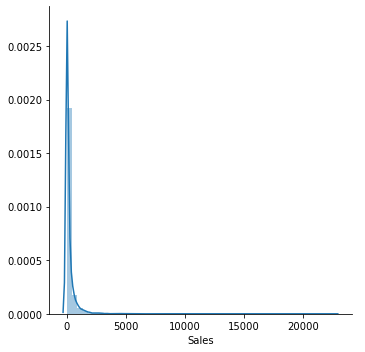

In [22]:
plt.figure(figsize=(15,8))
sns.FacetGrid(data, height=5).map(sns.distplot, "Sales").add_legend();
plt.show();

C:\Users\Drashti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x576 with 0 Axes>

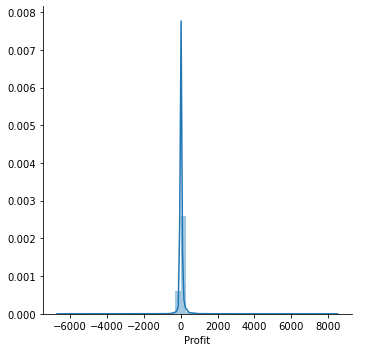

In [23]:
plt.figure(figsize=(15,8))
sns.FacetGrid(data, height=5).map(sns.distplot, "Profit").add_legend();
plt.show();

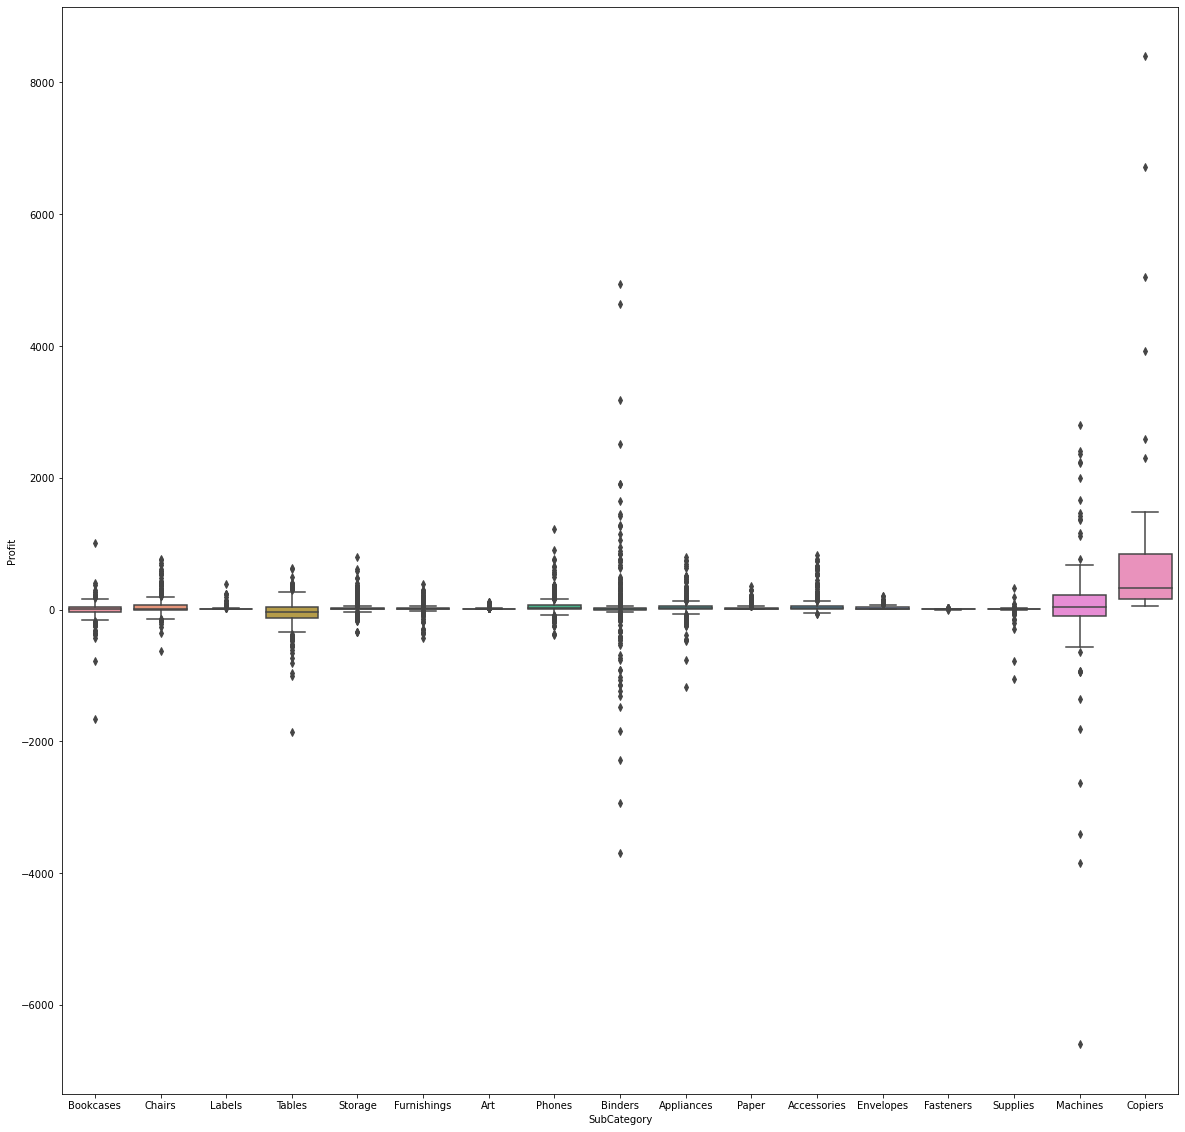

In [25]:
plt.figure(figsize=(20,20))
sns.boxplot(x='SubCategory',y='Profit', data=data)
plt.show()